### import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  #for the statistical tests
%matplotlib inline

### import the data

In [4]:
cust = pd.read_csv('D:/sampledata/cust_seg.csv')

In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [6]:
# write a UDF to caluclate the sum and mean of the series object
def fn_descriptive( x ):
    
    # missing values calculation
    ntot = x.shape[0]
    n = x.count()
    nmiss = ntot - n
    nmiss_perc = nmiss/ntot
    
    # get the lc and uc using IQR
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR =  q3 - q1
    lc_iqr = q1 - 1.5 * IQR
    uc_iqr = q3 + 1.5 * IQR
    
    # return the descripitves
    return pd.Series( [x.dtype, x.nunique(), 
                       ntot, n, nmiss, nmiss_perc,
                       IQR, lc_iqr, uc_iqr, 
                       x.sum(), x.mean(), x.var(), x.std(), 
                       x.min(),
                       x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99),
                       x.max()], 
                    index = ['dtype', 'cardinality',
                             'ntot', 'n', 'nmiss', 'nmiss_perc', 
                             'IQR', 'lc_iqr', 'uc_iqr', 
                             'sum', 'mean', 'var', 'std', 
                             'min', 
                             'p1', 'p5', 'p10',
                             'p25', 'p50', 'p75', 
                             'p90', 'p95', 'p99',
                             'max'])

### get the descriptives

In [7]:
cust.apply(fn_descriptive)

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
dtype,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64
cardinality,200,2,4,3,2,3,30,29,40,29
ntot,200,200,200,200,200,200,200,200,200,200
n,200,200,200,200,200,200,200,200,200,200
nmiss,0,0,0,0,0,0,0,0,0,0
nmiss_perc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IQR,99.5,1.0,1.0,1.0,0.0,0.25,16.0,14.25,16.8,15.675
lc_iqr,-98.5,-1.5,1.5,0.5,1.0,1.625,20.0,24.375,28.8,26.8125
uc_iqr,299.5,2.5,5.5,4.5,1.0,2.625,84.0,81.375,96.0,89.5125
sum,20100,109,686,411,232,405,10446,10555,12634.8,11610.5


### Q6: Corelations

In [8]:
cust.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

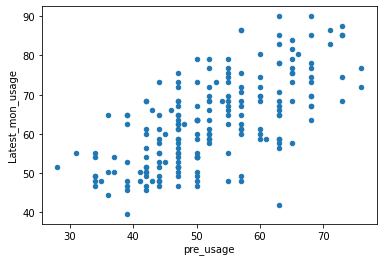

In [10]:
cust.plot( kind = 'scatter', x = 'pre_usage', y = 'Latest_mon_usage' )
plt.show()

In [11]:
cust.loc[:, ['pre_usage', 'Latest_mon_usage']].corr()

,pre_usage,Latest_mon_usage
pre_usage,1.00000,0.66228
Latest_mon_usage,0.66228,1.00000


In [12]:
# Ho: No relationship
# Ha: Association
# CI: 95%, p: 0.05

# perform the test 
stats.pearsonr( cust.pre_usage, cust.Latest_mon_usage )

# conclusion
# There is a strong relationsip between pre usage and latest month usage
# Candidates spending higher earlier are spending higher now as well

(0.6622801251558602, 1.2767419295069883e-26)

### Q5: Chi sq test

In [14]:
cust.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

In [18]:
# get the ob_freq_table from the dataset
obs_freq = pd.crosstab( cust.region, cust.segment )
obs_freq

segment,1,2,3
region,,,
1,16,19,12
2,20,44,31
3,9,42,7


In [19]:
# Ho: No relationship
# Ha: Association
# CI: 99%, p: 0.01

# perform the test 
stats.chi2_contingency( obs_freq )

# output: At 99% CI we can reject the H0
# business conclusion
# We have customers of different segments coming from different region

(16.604441649489342,
 0.0023066300908054713,
 4,
 array([[10.575, 24.675, 11.75 ],
        [21.375, 49.875, 23.75 ],
        [13.05 , 30.45 , 14.5  ]]))

### Q4: ANOVA or f-test

In [24]:
# get the num of segments
cust.segment.nunique()

3

In [22]:
# get the freq of segments
cust.segment.value_counts()

2    105
3     50
1     45
Name: segment, dtype: int64

In [28]:
cust.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

In [33]:
# declare the variable for which we want to do the analysis
var = 'Latest_mon_usage'

# filter the data based on segments
s1 = cust.loc[ cust.segment == 1, var ]
s2 = cust.loc[ cust.segment == 2, var ]
s3 = cust.loc[ cust.segment == 3, var ]

# display the mean of the three sample
print( 'mean of s1: ', s1.mean(), '| mean of s2: ', s2.mean(), '| mean of s3: ', s3.mean() )

mean of s1:  60.026666666666685 | mean of s2:  68.08000000000003 | mean of s3:  55.703999999999986


In [34]:
# Ho: All the samples are from SAME population, means are EQUAL
# Ha: Samples are from DIFFERENT population, means are UNEQUAL
# CI: 99%, p: 0.01

# perform the test
stats.f_oneway( s1, s2, s3 )

# conclusion
# Different segment custors have different average spending

F_onewayResult(statistic=29.279283801321778, pvalue=7.36401083352674e-12)

### Q1: 1-sample ttest

In [42]:
cust.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

In [45]:
# sample to be considered
var_name = 'post_usage_2ndmonth'

# mean values to be compared
pop_mean = 50
sample = cust.loc[:, var_name]
mean_sample = sample.mean()

# display the means
print('popmean: ', pop_mean, '| sample mean: ', mean_sample )

popmean:  50 | sample mean:  58.05250000000003


In [46]:
# H0: u <= 50
# Ha: u > 50
# CI: 99%, p: 0.01

# perform the test
stats.ttest_1samp( a = sample, popmean = pop_mean )

# Business conclusion
# spending has increased from the last year hypothysed value of 50

Ttest_1sampResult(statistic=10.922184044707544, pvalue=4.6342076107861245e-22)

### Q2: Paired sample ttest or Relational ttest

In [48]:
cust.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

In [54]:
# declare the post campaighn analysis variable for consideration
var_name = 'Post_usage_1month'

# print the means
print('pre usage mean:', cust.pre_usage.mean())
print( 'post usage mean:', cust.loc[:, var_name].mean() )

pre usage mean: 52.23
post usage mean: 52.775


In [55]:
# H0: u1 = u2
# Ha: u1 <> u2
# CI: 99%, p: 0.01

# perform the test
stats.ttest_rel( cust.pre_usage, cust.loc[:, var_name] )

# stats conclusion
# with the given sample we fail to reject the H0

# business conclusion
# if we go with the given sample, campaign is NOT sucessful

Ttest_relResult(statistic=-0.8673065458794775, pvalue=0.3868186820914985)

### Q3: independent sample ttest 

In [60]:
cust.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

In [63]:
# take the two samples
var_name = 'Post_usage_1month'
male = cust.loc[ cust.sex == 0, var_name ]
female = cust.loc[ cust.sex == 1, var_name ]

# display the mean usages
print('mean spend of male:', male.mean() )
print('mean spend of female:', female.mean() )

mean spend of male: 50.120879120879124
mean spend of female: 54.99082568807339


In [58]:
# H0: u1 = u2
# Ha: u1 <> u2
# CI: 99%, p: 0.01

# perform the test
stats.ttest_ind( male, female )

Ttest_indResult(statistic=0.7480109580953392, pvalue=0.4553410655360075)

In [59]:
# perform the test
stats.f_oneway( male, female )

F_onewayResult(statistic=0.5595203934307058, pvalue=0.45534106553600595)

### Connect to the databases

In [64]:
import pyodbc

In [67]:
sql_conn = pyodbc.connect('''DRIVER={SQL Server};SERVER=DESKTOP-7BJSN33\SQLEXPRESS;
                          DATABASE=DB_JAN22_WEEKEND;Trusted_Connection=yes''') 

In [71]:
query = 'SELECT * FROM TBL_ORDER;'
df = pd.read_sql( query, sql_conn )
df

,REF_NO,ORD_DTE,CUST_NAME,CATEGORY,PRODUCT,SALES,PROFIT
0,CA-2012-124891,2012-07-31,Rick Hansen,Technology,Accessories,2309.650,762.1845
1,CA-2014-135909,2014-10-14,Jane Waco,Office Supplies,Binders,5083.960,NaN
2,CA-2012-116638,2012-01-28,Joseph Holt,Furniture,Tables,4297.644,-1862.3124
3,CA-2014-143567,2014-11-03,Thomas Boland,Technology,Accessories,2249.910,517.4793
4,CA-2011-154627,2011-10-29,Sue Ann Reed,Technology,Phones,2735.952,341.9940
5,CA-2013-159016,2013-03-11,Karen Ferguson,Technology,Phones,4158.912,363.9048
6,CA-2012-139731,2012-10-15,Joel Eaton,Furniture,Chairs,2453.430,-350.4900
7,CA-2011-168494,2011-12-12,Nora Preis,Furniture,Tables,3610.848,135.4068
8,CA-2011-160766,2011-09-14,Darrin Martin,Technology,Machines,2799.960,1371.9804
9,US-2014-168116,2014-11-05,Grant Thornton,Technology,Machines,7999.980,-3839.9904


In [74]:
import pandasql

In [79]:
print(dir(pandasql.PandaSQL))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_init_connection', 'conn']
